In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/student-performance-data-set/student-por.csv')

In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

#### Feature Selection & Engg

In [6]:
df = df[['studytime', 'absences', 'failures', 'G1', 'G2', 'G3']]

In [7]:
df['result'] = [1 if value >= 10 else 0 for value in df['G3']]

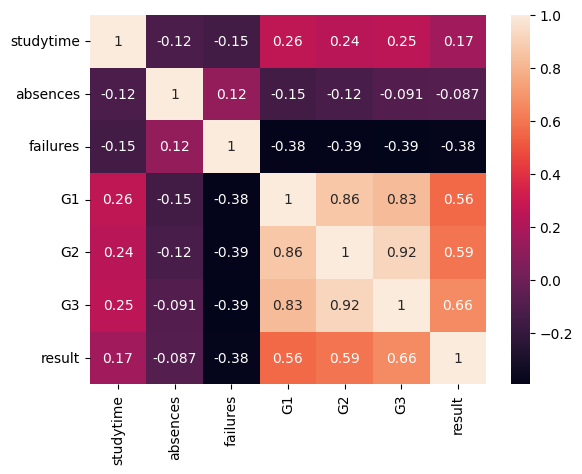

In [8]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

#### Spilt training data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(['G3','result'], axis=1)
Y_lr = df['G3']
Y_log = df['result']

In [11]:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(X, Y_lr, random_state=42, test_size=0.2)

In [12]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(X, Y_log, random_state=42, test_size=0.2)

## Model Training

### Linear Models

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb

In [14]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor' : RandomForestRegressor(random_state=42),
    'XGBoostRegressor': xgb.XGBRegressor(random_state=42),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'SGDRegressor': SGDRegressor(alpha=0.01, l1_ratio=0.5)
}

def evaluate_linear_models(x_train, x_test, y_train, y_test):
    result = []
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        result.append((name, score, rmse, mae))
    return result

With G1 & G2

In [15]:
results = evaluate_linear_models(x_train_lr, x_test_lr, y_train_lr, y_test_lr)
linear_mods = pd.DataFrame(results, columns=["Model", "R2", "RMSE", "MAE"])
linear_mods

,Model,R2,RMSE,MAE
0,LinearRegression,0.863264,1.154736,0.746241
1,RandomForestRegressor,0.817347,1.334609,0.797217
2,XGBoostRegressor,0.797759,1.404349,0.850241
3,Ridge,0.863241,1.154830,0.746191
4,Lasso,0.863017,1.155776,0.742903
5,SGDRegressor,0.849436,1.211716,0.795807


### Classification Models

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [17]:
models = {
    'LogisticRegression': LinearRegression(),
    'RandomForestClassifier' : RandomForestClassifier(n_estimators=200, random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'XGBoostRegressor': xgb.XGBClassifier(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(probability=True),
    'KNeighborsClassifier' : KNeighborsClassifier(n_neighbors=5)
}

def evaluate_logistic_models(x_train, x_test, y_train, y_test):
    result = []
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_pred_final = (y_pred >= 0.5).astype(int)
        score = accuracy_score(y_test, y_pred_final)
        result.append((name, score))
    return result

In [18]:
results = evaluate_logistic_models(x_train_log, x_test_log, y_train_log, y_test_log)
classification_mods = pd.DataFrame(results, columns=["Model", "Accuracy Score"])
classification_mods

,Model,Accuracy Score
0,LogisticRegression,0.907692
1,RandomForestClassifier,0.900000
2,GradientBoostingClassifier,0.907692
3,XGBoostRegressor,0.915385
4,DecisionTreeClassifier,0.915385
5,SVC,0.923077
6,KNeighborsClassifier,0.930769


#### Final Verdict of Performance of Models

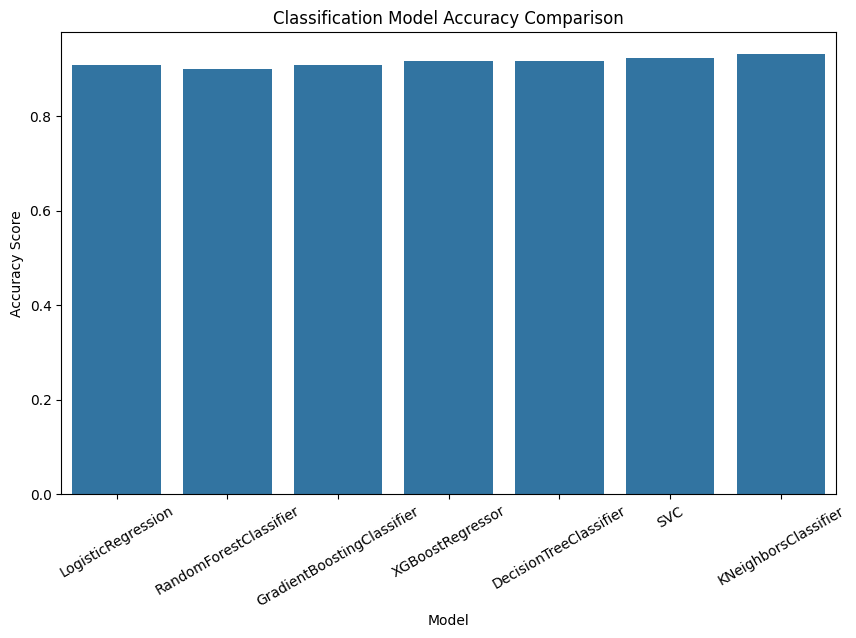

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=classification_mods, x="Model", y="Accuracy Score")
plt.title("Classification Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()

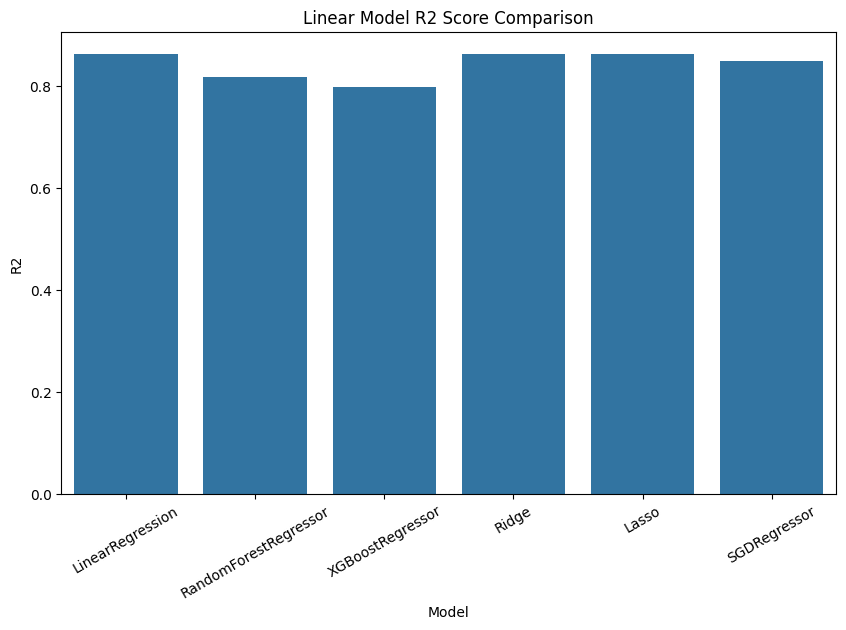

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=linear_mods, x="Model", y="R2")
plt.title("Linear Model R2 Score Comparison")
plt.xticks(rotation=30)
plt.show()